# Parameters Test

The purpose of this test is to understand which parameter ranges distinguish between the regime in which mutations are not overlapping (thus easily distinguishable) and the regime in which they are overlapping (reconstruction is required).

In [1]:
import sys
sys.path.insert(1, '../code') 
from Parameters import *
from Simulator import Simulator
import matplotlib.pyplot as plt
import numpy as np

## First Test: average number of events for each duplication

Here for semplicity we set: 
- distribution of the number of events = Poisson distribution;
- distribution of the Rearrangement length = truncated uniform distribution;
- all the events (Rearrangements/Mutations) are equiprobable:

The planned simulation should reach $O(10^6)$ cells at the end of the last generation (which would be the 20th). Unfortunately, my laptop does not reach the computing power and memory required to simulate 20 generations. \
To overcome the problem, we will simulate only 5 generations ($\frac{1}{4}$ of the total). Assuming that for each duplication each cell undergoes an average number of events, we expect that the average number of events that will give the same result but in 20 generations will be $\frac{1}{4}$ of that found.

In [2]:
number_of_generations = 5

In [3]:
n_tot = 2
plots = []
stat = np.zeros((n_tot, 2))
max_stat = np.zeros((n_tot, 2))
for average_events_number in range(n_tot):
     print(f"\nNumber of events: {average_events_number}")
     simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
          n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib)
     simul.run_visualization(simul.parent, number_of_generations)
     ave, stdv = simul.stat_cumulated_mutations()
     max_ave, max_stdv = simul.stat_max_cumulated_mutations()
     stat[average_events_number, 0], stat[average_events_number, 1] = ave, stdv
     max_stat[average_events_number, 0], max_stat[average_events_number, 1] = max_ave, max_stdv
     print(f"average: {ave}, standard deviation: {stdv}")
     print(f"max average: {max_ave}, max standard deviation: {max_stdv}")


Number of events: 0
average: 0.0, standard deviation: 0.0
max average: 0.0, max standard deviation: 0.0

Number of events: 1
average: 0.345703125, standard deviation: 0.4917494019978412
max average: 1.125, max standard deviation: 0.33071891388307384


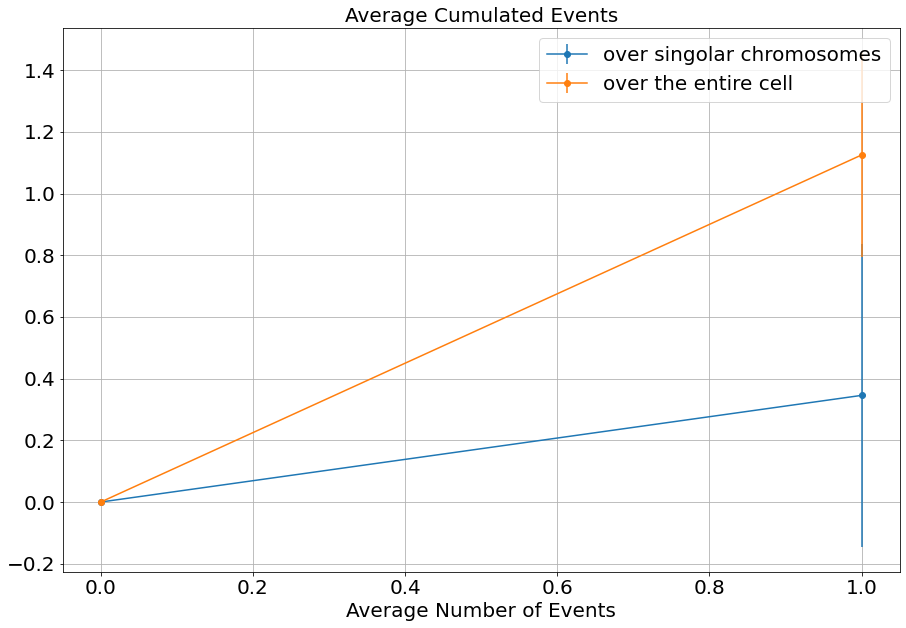

In [4]:
fig, ax = plt.subplots(figsize = (15,10)) 
ax.set_title("Average Cumulated Events", fontsize = 20)
ax.set_xlabel("Average Number of Events", fontsize = 20)
ax.errorbar(range(n_tot), stat[:, 0], yerr=stat[:, 1], marker='o', label='over singolar chromosomes')
ax.errorbar(range(n_tot), max_stat[:, 0], yerr=max_stat[:, 1], marker='o', label='over the entire cell')
ax.legend(fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.grid(True)